In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import scikitplot as skplt

In [ ]:
data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data[['age', 'trtbps', 'chol', 'thalachh']].describe()

,age,trtbps,chol,thalachh
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


In [ ]:
data.isnull().sum() # We have no missing values in the dataset

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## **EDA**

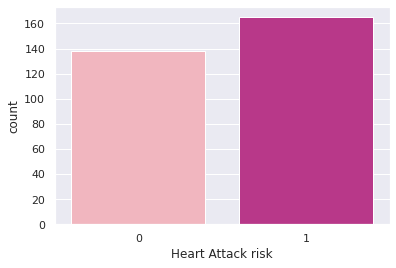

In [ ]:
sns.countplot(x = data['output'], palette= 'RdPu')
plt.xlabel('Heart Attack risk');

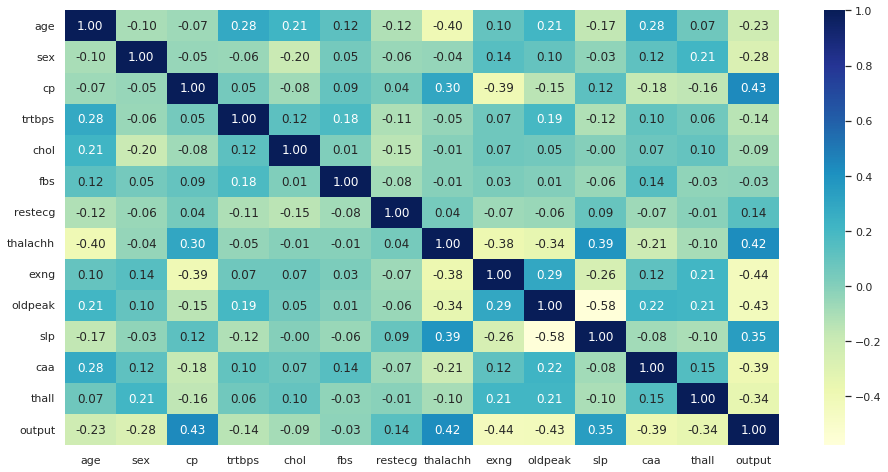

In [ ]:
plt.figure(figsize= (16, 8))
sns.heatmap(data.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f');

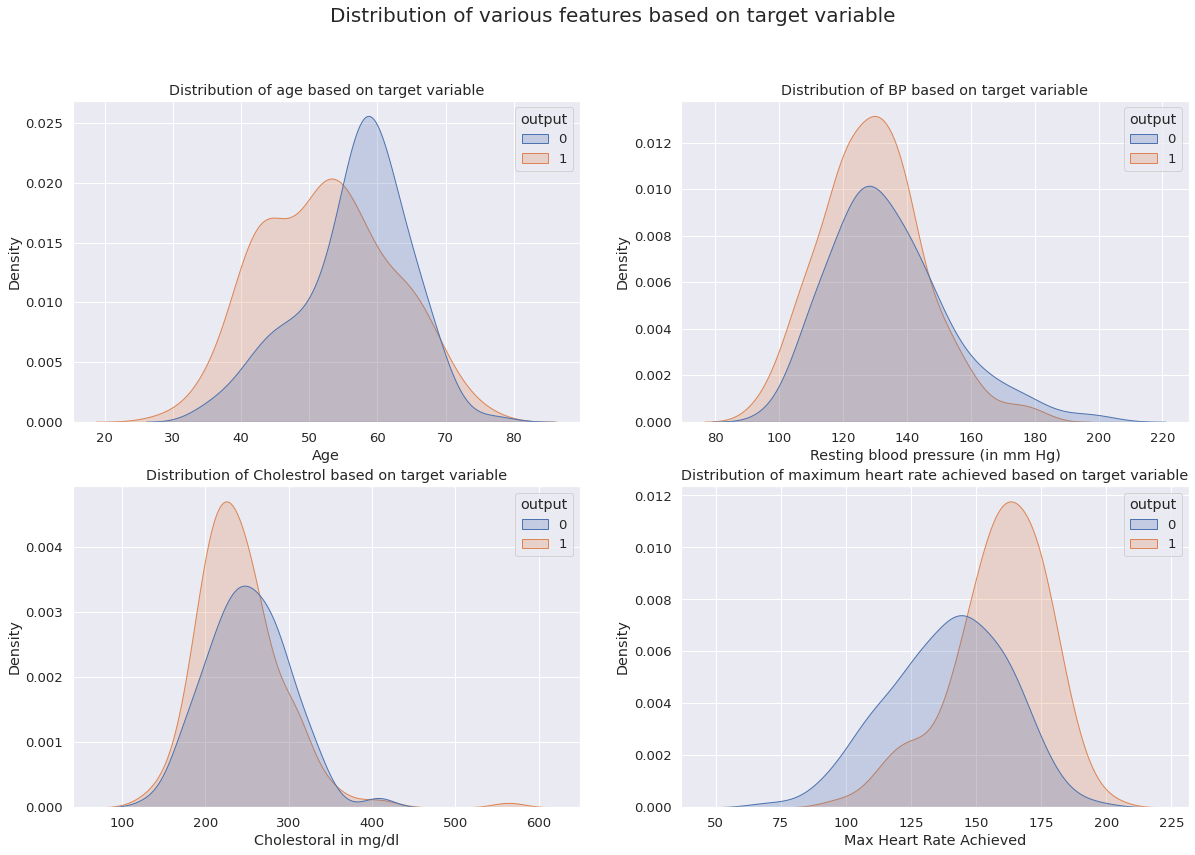

In [ ]:
sns.set_context('notebook', font_scale= 1.2)
fig, ax = plt.subplots(2, 2, figsize = (20, 13))

plt.suptitle('Distribution of various features based on target variable', fontsize = 20)

ax1 = sns.kdeplot(x ='age', data= data, hue= 'output', shade= True, ax= ax[0, 0])
ax1.set(xlabel = 'Age', title= 'Distribution of age based on target variable')

ax2 = sns.kdeplot(x ='trtbps', data= data, hue= 'output', shade= True, ax= ax[0, 1])
ax2.set(xlabel = 'Resting blood pressure (in mm Hg)', title= 'Distribution of BP based on target variable')

ax3 = sns.kdeplot(x ='chol', data= data, hue= 'output', shade= True, ax= ax[1, 0])
ax3.set(xlabel = 'Cholestoral in mg/dl', title= 'Distribution of Cholestrol based on target variable')

ax4 = sns.kdeplot(x ='thalachh', data= data, hue= 'output', shade= True, ax= ax[1, 1])
ax4.set(xlabel = 'Max Heart Rate Achieved', title= 'Distribution of maximum heart rate achieved based on target variable')

plt.show()

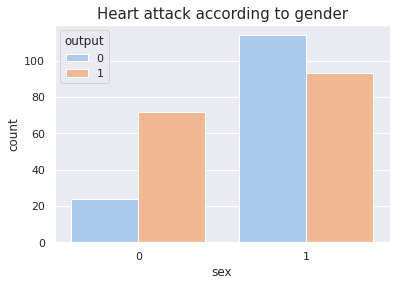

In [ ]:
sns.countplot(x = 'sex', data= data, hue= 'output', palette= 'pastel')
plt.title('Heart attack according to gender', fontsize = 15);

In [ ]:
X = data.drop('output', axis= 1)
y = data.output

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25 ,random_state= 42)

In [ ]:
reg = LogisticRegression(penalty='l1', solver= 'liblinear')
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

In [ ]:
print("True heart attack chances      :", y_test.values[:20])
print("Predicted heart attack chances :", pred[:20])

True heart attack chances      : [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0]
Predicted heart attack chances : [0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0]


In [ ]:
print(f'Accuracy of our model is {round(accuracy_score(y_test, pred) * 100, 2)}%')

Accuracy of our model is 88.16%


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [ ]:
print(f'Precision: {round(precision_score(y_test, pred), 2)}')

Precision: 0.88


In [ ]:
print(f'Recall: {round(recall_score(y_test, pred), 2)}')

Recall: 0.9


In [ ]:
pred_prob = reg.predict_proba(X_test)
pred_prod_df = pd.DataFrame(data= pred_prob, columns= ['Low chances of heart attack', 'High chances of heart attack'])
pred_prod_df.head()

,Low chances of heart attack,High chances of heart attack
0,0.886814,0.113186
1,0.252503,0.747497
2,0.188471,0.811529
3,0.977005,0.022995
4,0.057006,0.942994


In [ ]:
# Storing the predicted probabilities of high chances of heart attack
pred_1 = reg.predict_proba(X_test)[:, 1]

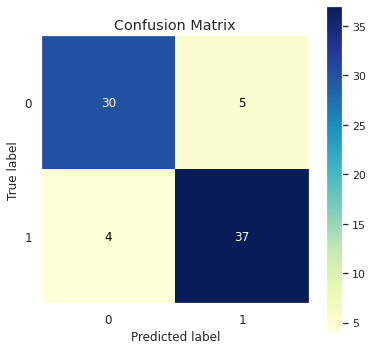

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,pred, figsize=(6,6), cmap= 'YlGnBu');

Number of **False Positives** : 5 <br>
Number of **False Negatives** : 4

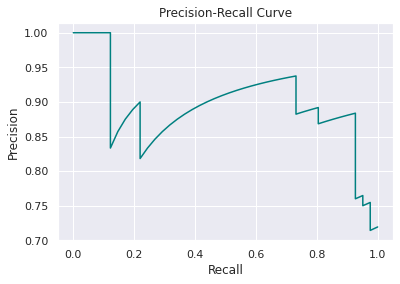

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, pred_1)

fig, ax = plt.subplots()
ax.plot(recall, precision, color='teal')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

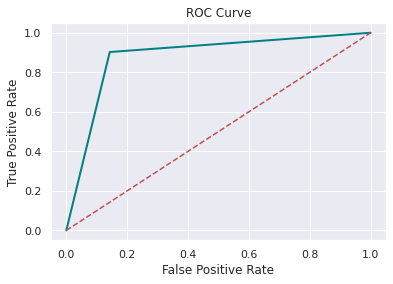

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, pred_1)
print('ROC AUC Score: {:.2f}'.format(roc_auc))

ROC AUC Score: 0.91
